In [1]:
library(tidyverse)
library(ggplot2)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [19]:
df <- read.csv('dem_gamm_models.csv')

In [20]:
lowest <- df %>%
    group_by(school) %>% slice(which.min(aic))

In [21]:
lowest$key <- paste0(lowest$school, lowest$k)
df$key <- paste0(df$school, df$k)

In [22]:
lowest

X,coeff,lower,upper,period,school,k,aic,coeff_party,key
373,-0.035413737,-0.05597127,-0.014856208,31,s1,31,-16241.085,dem,s131
311,-0.035924606,-0.07631535,0.004466135,31,s2,31,-2173.412,dem,s231
249,-0.024634850,-0.05659843,0.007328727,31,s3,31,-15116.022,dem,s331
615,0.011167541,-0.06309472,0.085429804,30,s4,30,-9127.297,dem,s430
125,-0.015247035,-0.04274329,0.012249220,31,s5,31,-24864.375,dem,s531
63,-0.004647758,-0.04703345,0.037737933,31,s6,31,-6265.967,dem,s631
1,0.006959809,-0.01722934,0.031148959,31,s8,31,-19014.897,dem,s831


In [23]:
final <- df[df$key %in% lowest$key, ]

In [24]:
final_rep <- final[final$coeff_party == 'rep', ]
final_dem <- final[final$coeff_party == 'dem', ]

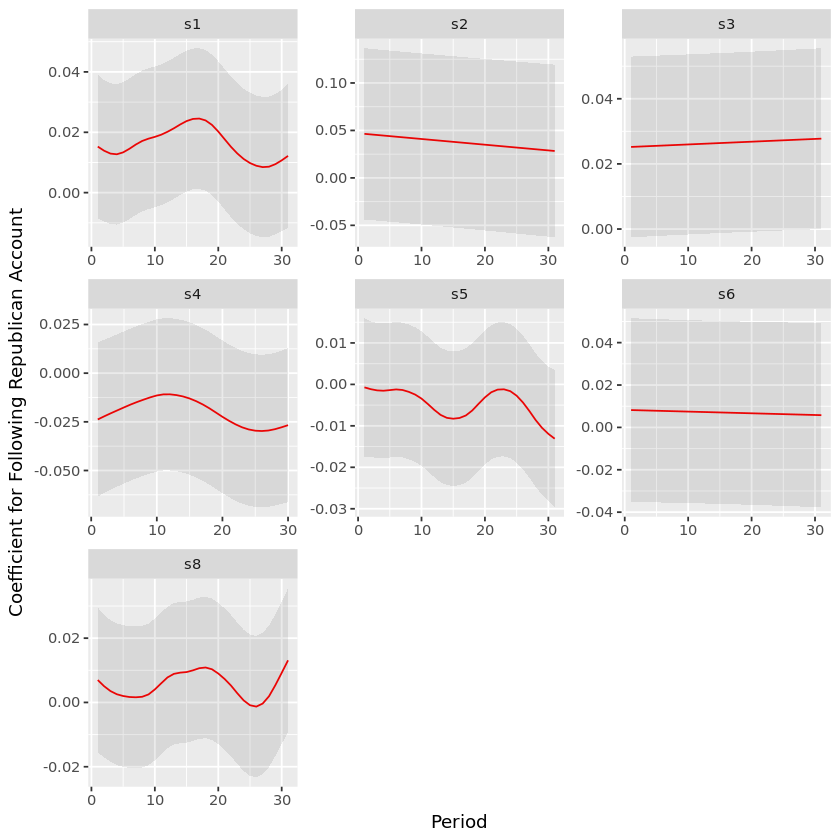

In [25]:
ggplot(final_rep, aes(x = period, y = coeff)) +
  geom_line(col='red') +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.1) +
  facet_wrap(~school, nrow = 3, scales = "free") + 
  ylab('Coefficient for Following Republican Account') +
  xlab('Period')

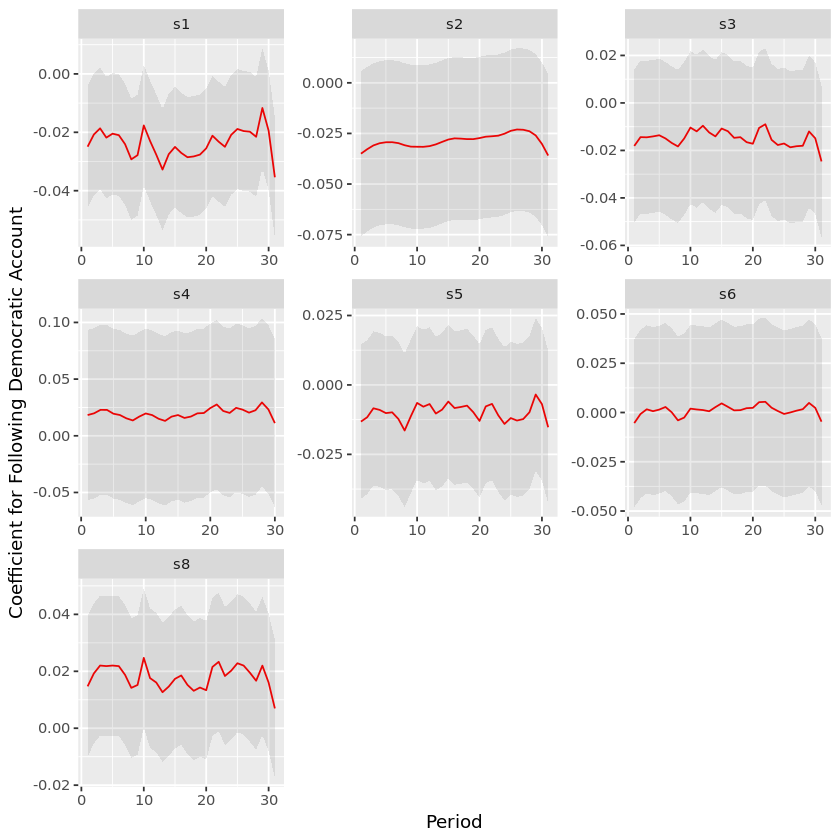

In [26]:
ggplot(final_dem, aes(x = period, y = coeff)) +
  geom_line(col='red') +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 0.1) +
  facet_wrap(~school, nrow = 3, scales = "free") + 
  ylab('Coefficient for Following Democratic Account') +
  xlab('Period')